In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lets first study the general overlap between cascade and hese

In [5]:
hese_sample_name = "IC86_pass2_SnowStorm_v2_FTP_Baseline_hdf-v7_noMuon"
hese_datasets_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/flavor_globalfit/hese/combined"

hese_df = pd.read_parquet( f"{hese_datasets_path}/{hese_sample_name}/dataset_{hese_sample_name}.parquet" )

cascacde_sample_name = "IC86_pass2_cascade_ftpv3_baseline_22612_22644"
cascade_datasets_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/flavor_globalfit/cascade/combined"

cascade_df = pd.read_parquet( f"{cascade_datasets_path}/{cascacde_sample_name}/dataset_{cascacde_sample_name}.parquet" )

How many events are there in my hese_df that don't end up in the analysis histogram?

In [4]:
for key in hese_df.keys(): print(key)

event_id
mjd
reco_energy
reco_energy_exists
reco_energy_fit_status
reco_dir_fit_status
reco_dir
reco_dir_exists
reco_length
reco_length_exists
reco_length_fit_status
FinalTopology
FinalTopology_exists
FinalEventClass
FinalEventClass_exists
TauMonoDiff_rlogl
TauMonoDiff_rlogl_exists
Taupede_Asymmetry
Taupede_Asymmetry_exists
Taupede_Distance
Taupede_Distance_exists
Taupede1_Particles_energy
Taupede1_Particles_energy_exists
Taupede2_Particles_energy
Taupede2_Particles_energy_exists
cscdSBU_MonopodFit4_noDC_zenith
cscdSBU_MonopodFit4_noDC_zenith_exists
MonopodFit_iMIGRAD_PPB0_Delay_ice
MonopodFit_iMIGRAD_PPB0_Delay_ice_exists
CVStatistics_q_max_doms
CVStatistics_q_max_doms_exists
cscdSBU_VertexRecoDist_CscdLLh
cscdSBU_VertexRecoDist_CscdLLh_exists
MonopodFit_iMIGRAD_PPB0_energy
MonopodFit_iMIGRAD_PPB0_energy_exists
MonopodFit_iMIGRAD_PPB0_x
MonopodFit_iMIGRAD_PPB0_y
MonopodFit_iMIGRAD_PPB0_z
cscdSBU_Qtot_HLC_log
cscdSBU_Qtot_HLC_log_exists
Taupede_ftpFitParams_rlogl
Taupede_ftpFitParams_r

In [5]:
for key in cascade_df.keys(): print(key)

event_id
mjd
energy_monopod
energy_monopod_exists
energy_monopod_fit_status
zenith_monopod
reco_dir_fit_status
reco_dir_exists
cscdSBU_MonopodFit4_noDC_zenith
cscdSBU_MonopodFit4_noDC_x
cscdSBU_MonopodFit4_noDC_y
cscdSBU_MonopodFit4_noDC_z
cscdSBU_MonopodFit4_noDC_azimuth
cscdSBU_MuonWeight_GaisserH4a
cscdSBU_MuonWeight_DPMC
cscdSBU_MCMuon_energy
cscdSBU_Qtot_HLC_log_value
CascadeLlhVertexFitParams_rlogL
cscdSBU_MonopodFit4_noDC_Delay_ice_value
cscdSBU_VertexRecoDist_CscdLLh
LineFit_zenith
cscdSBU_I3XYScale_noDC_value
cscdSBU_L4StartingTrackHLC_cscdSBU_MonopodFit4_noDCVetoCharge_value
cscdSBU_L4VetoTrack_cscdSBU_MonopodFit4_noDCVetoCharge_value
cscdSBU_VetoDepthFirstHit_value
CscdL3_SPEFit16_zenith
CscdL3_SPEFit16FitParams_rlogl
cscdSBU_MonopodFit4_noDCFitParams_rlogl
Taupede_FitParams_nmini
Taupede_FitParams_rlogl
TauMonoDiff_rlogl_value
Taupede_Asymmetry_value
Taupede_Distance_value
Taupede_1Particles_energy
Taupede_1Particles_x
Taupede_1Particles_y
Taupede_1Particles_z
Taupede_2Part

In [6]:
total_hese = len(hese_df)
total_hese_energy = len(hese_df[hese_df["reco_energy"] > 10**4.778])
print("Fraction in analysis histogram energy", total_hese_energy/total_hese)
hese_df_analysis = hese_df[ hese_df["reco_energy"] > 10**4.778 ].copy()

Fraction in analysis histogram energy 0.9333588880460633


In [7]:
def get_rates(df, per_flavor_norm = 2.12, gamma_astro = 2.87, livetime_s = 1*365*24*3600):
    df["fluxless_weight"] = df["powerlaw"]*1e18*(df["MCPrimaryEnergy"]/1e5)**2
    rates = {}
    for f, l in zip([12, 14, 16], [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$']):
        m = np.abs(df["MCPrimaryType"]) == f
        e = df.loc[m, "MCPrimaryEnergy"]
        w = df.loc[m, "fluxless_weight"]*0.5*(per_flavor_norm*1e-18)*(e/1e5)**-gamma_astro*livetime_s
        rates[f] = np.sum(w)
    return rates

In [8]:
def plot_flavor_df(df, variable, binning, per_flavor_norm = 2.12, gamma_astro = 2.87, livetime_s = 1*365*24*3600, xscale = "log", yscale = "linear"):
    plt.figure()
    df["fluxless_weight"] = df["powerlaw"]*1e18*(df["MCPrimaryEnergy"]/1e5)**2
    for f, l in zip([12, 14, 16], [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$']):
        m = np.abs(df["MCPrimaryType"]) == f
        v = df.loc[m, variable]
        e = df.loc[m, "MCPrimaryEnergy"]
        w = df.loc[m, "fluxless_weight"]*0.5*(per_flavor_norm*1e-18)*(e/1e5)**-gamma_astro*livetime_s
        plt.hist(v, bins=binning, weights=w, histtype='step', label=f"{l}")

    plt.xlabel(variable)
    plt.ylabel("Weighted counts")
    plt.legend()
    plt.tight_layout()
    plt.xscale(xscale)
    plt.yscale(xscale)
    plt.show()

{12: 3.4431231897758394, 14: 1.2656403529248406, 16: 1.9756460207637325}


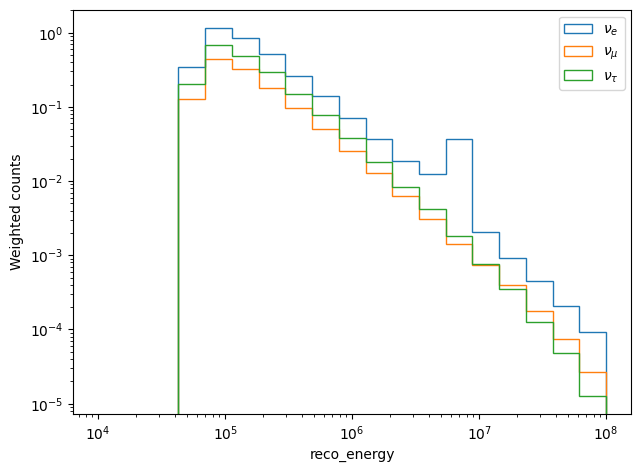

In [9]:
rates_hese_analysis = get_rates(hese_df_analysis)
print(rates_hese_analysis)
plot_flavor_df(hese_df_analysis, "reco_energy", np.geomspace(1e4,1e8,20))

{12: 228.8182358604751, 14: 42.533191157145154, 16: 148.86914072947022}


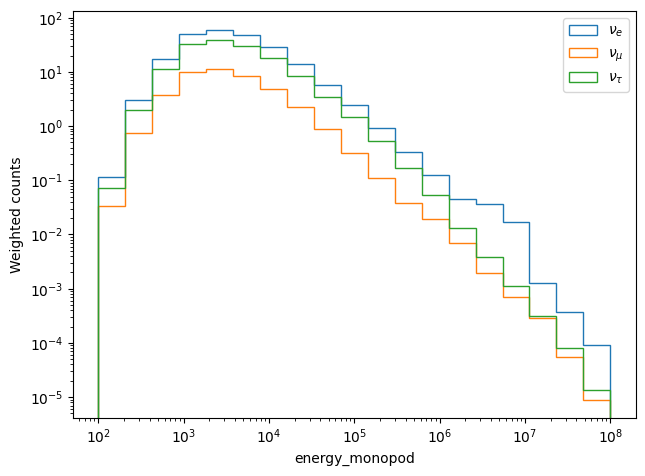

In [10]:
rates_cascade = get_rates(cascade_df)
print(rates_cascade)
plot_flavor_df(cascade_df, "energy_monopod", np.geomspace(1e2,1e8,20))

In [11]:
hese_dataset_id = hese_df_analysis["event_id"].reset_index()["level_0"]
hese_run_id = hese_df_analysis["event_id"].reset_index()["level_1"]
hese_event_id = hese_df_analysis["event_id"].reset_index()["event_id"]
hese_dataset_run_id = hese_dataset_id.astype(str) + hese_run_id.astype(str).str.zfill(5)

In [12]:
cascade_dataset_run_id = cascade_df["event_id"].reset_index()["level_0"]
cascade_event_id = cascade_df["event_id"].reset_index()["event_id"]

In [13]:
# Build tuples of (dataset_run_id, event_id)
hese_keys = list(zip(hese_dataset_run_id, hese_event_id))
cascade_keys = list(zip(cascade_dataset_run_id.astype(str), cascade_event_id))

# Find the overlap
overlap = set(hese_keys) & set(cascade_keys)

# Optional: see how many overlapping events
print(f"Number of overlapping events: {len(overlap)}")

Number of overlapping events: 152694


In [14]:
# HESE mask: keep only events NOT in overlap
mask_hese = [k not in overlap for k in hese_keys]
hese_df_clean = hese_df_analysis[mask_hese].copy()

# Cascade mask: same for cascade
mask_cascade = [k not in overlap for k in cascade_keys]
cascade_df_clean = cascade_df[mask_cascade].copy()

{12: 226.18833059029447, 14: 42.20282058731832, 16: 147.4009390814218}


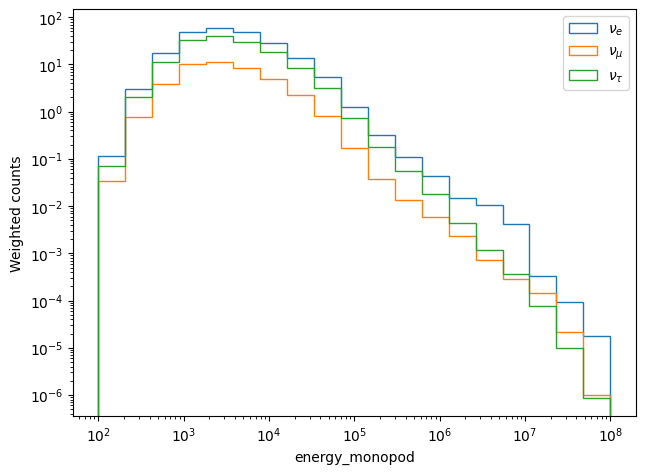

In [15]:
rates_cascade_clean = get_rates(cascade_df_clean)
print(rates_cascade_clean)
plot_flavor_df(cascade_df_clean, "energy_monopod", np.geomspace(1e2,1e8,20))

{12: 2.0604808681216893, 14: 0.9340119759086289, 16: 0.7729023334222225}


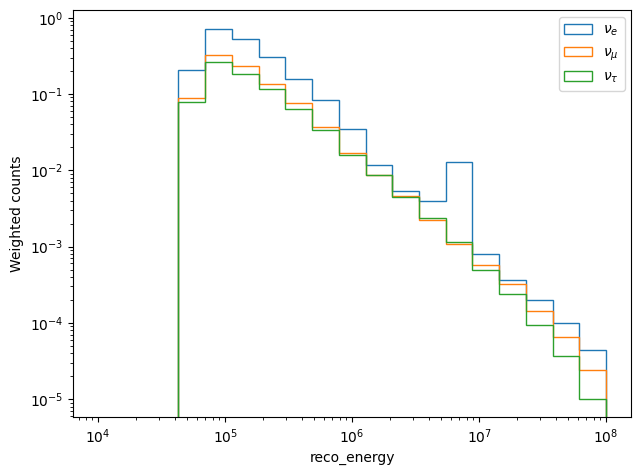

In [16]:
rates_hese_clean = get_rates(hese_df_clean)
print(rates_hese_clean)
plot_flavor_df(hese_df_clean, "reco_energy", np.geomspace(1e4,1e8,20))

Lets see how many events both samples lost, based on HESE weighting

In [17]:
print(10*"=","hese went from")
for f in rates_hese_clean:
    print(f, rates_hese_analysis[f], "to", rates_hese_clean[f], "diff", rates_hese_analysis[f]-rates_hese_clean[f])
print(10*"=","cascade went from")
for f in rates_cascade_clean:
    print(f, rates_cascade[f], "to", rates_cascade_clean[f], "diff", rates_cascade[f]-rates_cascade_clean[f])

========== hese went from
12 3.4431231897758394 to 2.0604808681216893 diff 1.3826423216541501
14 1.2656403529248406 to 0.9340119759086289 diff 0.3316283770162116
16 1.9756460207637325 to 0.7729023334222225 diff 1.20274368734151
========== cascade went from
12 228.8182358604751 to 226.18833059029447 diff 2.629905270180643
14 42.533191157145154 to 42.20282058731832 diff 0.3303705698268331
16 148.86914072947022 to 147.4009390814218 diff 1.4682016480484208


Do I have duplicate keys?

In [18]:
from collections import Counter
# Count how many times each key appears
hese_count = Counter(hese_keys)
cascade_count = Counter(cascade_keys)

# Find duplicates: keys appearing more than once
hese_duplicates = [k for k, v in hese_count.items() if v > 1]
cascade_duplicates = [k for k, v in cascade_count.items() if v > 1]

print(f"HESE duplicates: {len(hese_duplicates)}")
print(f"Cascade duplicates: {len(cascade_duplicates)}")

HESE duplicates: 0
Cascade duplicates: 0


Did I remove the same amount of events from each dataset?

In [19]:
print("overlap", len(overlap))
print("hese events", len(hese_df_analysis))
print("hese events clean", len(hese_df_clean))
print("removed hese", len(hese_df_analysis)-len(hese_df_clean))
print(20*"=")
print("overlap", len(overlap))
print("cascade events", len(cascade_df))
print("cascade events clean", len(cascade_df_clean))
print("removed cascade", len(cascade_df)-len(cascade_df_clean))

overlap 152694
hese events 345760
hese events clean 193066
removed hese 152694
overlap 152694
cascade events 1074104
cascade events clean 921410
removed cascade 152694


In [20]:
hese_df_overlap = hese_df_analysis[np.array(~np.array(mask_hese))].copy()
cascade_df_overlap = cascade_df[np.array(~np.array(mask_cascade))].copy()

In [37]:
hese_df_overlap[["event_id","MCPrimaryEnergy","powerlaw"]]

event_id  MCPrimaryEnergy      powerlaw
22612 0    40   0        40     1.197996e+06  2.542320e-12
           57   0        57     2.812048e+06  1.692746e-12
      1    11   0        11     1.611437e+07  1.177489e-12
           57   0        57     1.199173e+07  1.373062e-12
           59   0        59     3.904028e+07  3.621286e-16
...                     ...              ...           ...
22645 4998 6625 0      6625     6.872286e+05  5.757764e-13
      4999 2758 0      2758     3.835186e+05  1.352241e-12
           3512 0      3512     4.393857e+05  9.374548e-12
           5995 0      5995     1.206740e+05  5.706949e-13
           6325 0      6325     4.461566e+05  8.451168e-13

[152694 rows x 3 columns]

In [38]:
cascade_df_overlap[["event_id","MCPrimaryEnergy","powerlaw"]]

event_id  MCPrimaryEnergy      powerlaw
2261200000 40   0        40     1.197996e+06  2.756217e-12
           57   0        57     2.812048e+06  1.835165e-12
2261200001 11   0        11     1.611437e+07  1.276557e-12
           57   0        57     1.199173e+07  1.488584e-12
           59   0        59     3.904028e+07  3.925961e-16
...                     ...              ...           ...
2264504998 6625 0      6625     6.872286e+05  5.737036e-13
2264504999 2758 0      2758     3.835186e+05  1.347373e-12
           3512 0      3512     4.393857e+05  9.340799e-12
           5995 0      5995     1.206740e+05  5.686404e-13
           6325 0      6325     4.461566e+05  8.420744e-13

[152694 rows x 3 columns]

Lets split the cascade sample in double and normal

In [27]:
def overlap( df_cascade, df_hese ):

    hese_dataset_id = df_hese["event_id"].reset_index()["level_0"]
    hese_run_id = df_hese["event_id"].reset_index()["level_1"]
    hese_event_id = df_hese["event_id"].reset_index()["event_id"]
    hese_dataset_run_id = hese_dataset_id.astype(str) + hese_run_id.astype(str).str.zfill(5)

    cascade_dataset_run_id = df_cascade["event_id"].reset_index()["level_0"]
    cascade_event_id = df_cascade["event_id"].reset_index()["event_id"]

    # Build tuples of (dataset_run_id, event_id)
    hese_keys = list(zip(hese_dataset_run_id, hese_event_id))
    cascade_keys = list(zip(cascade_dataset_run_id.astype(str), cascade_event_id))

    # Find the overlap
    overlap = set(hese_keys) & set(cascade_keys)

    print(f"Number of overlapping events: {len(overlap)}")

    mask_hese = [k not in overlap for k in hese_keys]
    hese_df_clean = df_hese[mask_hese].copy()

    mask_cascade = [k not in overlap for k in cascade_keys]
    cascade_df_clean = df_cascade[mask_cascade].copy()

    return cascade_df_clean, hese_df_clean, overlap

In [28]:
cascacde_sample_name = "IC86_pass2_cascade_ftpv3_baseline_22612_22644"
cascade_datasets_split_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/flavor_globalfit/cascade/split"

cascade_double_df = pd.read_parquet( f"{cascade_datasets_split_path}/{cascacde_sample_name}/train_zheyang_bdt1_0.45_bdt2_0.67/dataset_{cascacde_sample_name}_double.parquet" )
cascade_cascade_df = pd.read_parquet( f"{cascade_datasets_split_path}/{cascacde_sample_name}/train_zheyang_bdt1_0.45_bdt2_0.67/dataset_{cascacde_sample_name}_cascade.parquet" )

In [29]:
cascade_double_clean_df, hese_df_analysis_clean, overlap_double = overlap( df_cascade=cascade_double_df, df_hese=hese_df_analysis )
cascade_cascade_clean_df, hese_df_analysis_clean, overlap_cascade = overlap( df_cascade=cascade_cascade_df, df_hese=hese_df_analysis )

Number of overlapping events: 15271
Number of overlapping events: 137423


In [30]:
rates_cascade_double = get_rates(cascade_double_df)
rates_cascade_double_clean = get_rates(cascade_double_clean_df)
rates_cascade_cascade = get_rates(cascade_cascade_df)
rates_cascade_cascade_clean = get_rates(cascade_cascade_clean_df)

In [32]:
print(10*"=","cascade double went from")
for f in rates_cascade_double:
    print(f, rates_cascade_double[f], "to", rates_cascade_double_clean[f], "diff", rates_cascade_double[f]-rates_cascade_double_clean[f])
print(10*"=","cascade cascade went from")
for f in rates_cascade_cascade:
    print(f, rates_cascade_cascade[f], "to", rates_cascade_cascade_clean[f], "diff", rates_cascade_cascade[f]-rates_cascade_cascade_clean[f])

========== cascade double went from
12 0.009983537518380417 to 0.006116313518989142 diff 0.003867223999391275
14 0.007633801183358123 to 0.0037881753497829786 diff 0.0038456258335751443
16 0.4377356094421145 to 0.19803099320069514 diff 0.23970461624141934
========== cascade cascade went from
12 228.80825232295675 to 226.18221427677545 diff 2.626038046181293
14 42.52555735596179 to 42.19903241196852 diff 0.32652494399327026
16 148.43140512002813 to 147.20290808822116 diff 1.2284970318069668
